The purpose of this paper is to compare pricing plans for two cloud computing services On-Demand service and Reserved service. On-Demand service suggests weekly payments for actual consumption of cloud resources while Reserved suggests payments in advance for a certain period of time, say a year. The paper consists of three sections. In Section 1 we present our approach to the problem. Section 2 describes how we estimated required reserves for On-Demand service which is crucial for analysis. Section 3 presents our results and their comparison to real data and summarizes our analysis.

# 1. General Approach
Our analysis is based on two main assumptions:
1. Consuming one instance of On-Demand service is equal to consuming $\alpha$ instances of Reserved services. The intuition behind this is quite simple - as customers goes into On-Demand contract, the provider will have to create additional reserves $(\alpha-1$ instance) in order to be able to meet extra demand. Naturally, the provider will charge the client for maintaining this reserves and consequently buying one instance of On-Demand service will be the same for the customer as buying $\alpha$ instances of Reserved service
2. Our customers are rational. This means that if they discover that annual price of one On-Demand instance does not equal to annual price of using $\alpha$ instances of Reserved service, they will switch to the cheaper service. Thus, if we want the customers to use both services we need to maintain these prices equal.

Now let us derive annual price for one instance of On-Demand service. Assume there is $\mathcal{T}$ periods in a year. Let $p^{O D}$ be price of using one On-Demand instance for $1 / \mathcal{T}$ of a year and let $r$ be interest rate. Then annual price $\mathcal{P}^{O D}$ of one On-Demand instance will be equal to present value of $\mathcal{T}$ payments of $p^{O D}$ during the year:

$$
\mathcal{P}^{O D}=\sum_{\tau=1}^{\mathcal{T}} \frac{p^{O D}}{(1+r / \mathcal{T})^{\tau}}
$$

Let $p^{R E}$ be price for using one On-Demand instance for $1 / \mathcal{T}$ of a year. Since all the payments are made in advance in the beginning of the period, annual price $\mathcal{P}^{R E}$ of one Reserved instance will be:

$$
\mathcal{P}^{R E}=\mathcal{T} p^{R E}
$$

Customers rationality condition suggests $\mathcal{P}^{O D}=\alpha \mathcal{P}^{R E}$ and thus we obtain:

$$
\sum_{\tau=1}^{\mathcal{T}} \frac{p^{O D}}{(1+r / \mathcal{T})^{\tau}}=\alpha \mathcal{T} p^{R E}
$$

Our purpose is to estimate $\beta=p^{O D} / p^{R E}$. To do it we just need to know $\alpha$. Section 2 describes its estimation.

# 2. Estimating Reserves for On-Demand Service

Since all customers are homogeneous with respect to mean and standard deviation of their consumption, we assume that on-demand consumption of each customer $i=1 \ldots N$ follows:

$$
C_{t}^{i}=C_{t-1}^{i}+\sigma \varepsilon_{t}^{i},
$$

where $C_{0}^{i}=\mu$ and consumption shock $\varepsilon_{t}^{i}$ is $\mathrm{i}$-th element of random $N \times 1$ vector $\varepsilon_{t}$ drawn from multivariate normal distribution $\mathcal{N}(0, \Sigma)$ where $\Sigma$ is $N \times N$ matrix such that:

$$
\Sigma=\left(\begin{array}{ccccc}
1 & \rho & \rho & \ldots & \rho \\
\rho & 1 & \rho & \ldots & \rho \\
\ldots & \ldots & \ldots & \ldots & \ldots \\
\rho & \rho & \rho & \ldots & 1
\end{array}\right)
$$

For each period $t$ we define average consumption $C_{t}$ as:

$$
C_{t}=\frac{1}{N} \sum_{i=1}^{N} C_{t}^{i} .
$$

Then $C_{0}=\mu$ and $C_{t}=C_{t-1}+\sigma \xi_{t}$, where $\xi_{t}=\frac{1}{N} \sum_{i=1}^{N} \varepsilon_{t}^{i}$ is average consumption shock. In matrix form we may write this as

$$
\xi_{t}=\frac{1}{N} B \varepsilon_{t},
$$

where B is $1 \times N$ unit row: $B=\left(\begin{array}{llll}1 & 1 & \ldots & 1\end{array}\right)$ Since $\xi_{t}$ is affine transformation of $\varepsilon_{t}$, its distribution will be the following:

$$
\xi_{t} \sim \mathcal{N}\left(0, \frac{1}{N^{2}} B \Sigma B^{T}\right)
$$

As $N$ tends to infinity (we have tens of thousands of users), we obtain:

$$
\xi_{t} \sim \mathcal{N}\left(0, \frac{1}{N^{2}}(N+N(N-1) \rho)\right) \stackrel{d}{\rightarrow} \mathcal{N}(0, \rho)
$$

Then $C_{t}$ may be written as:

$$
C_{t}=\mu+\sigma \sum_{\tau=0}^{t} \xi_{\tau}
$$

We require $R$, the reserves we make, to satisfy:

$$
\operatorname{Pr} \left ( \max _{t \in[0 ; T]} C_{t} < R \right) \geq \pi,
$$

where $\pi$ is confidence level probability and $T$ is considered time horizon. We may think of $T$ as a period of time required to deploy new capacities. Indeed, it is easy to show that $R$ increases with $T$. It means that if we are able to provide extra resources with very short lag we do need massive reserves and vice versa. We know that time from ordering new capacities to their deployment is approximately 12 weeks, thus we may take $T=12$ in our further analysis.

Unfortunately, it is hard to derive distribution of $\max _{t \in[0 ; T]} C_{t}$ analytically, but we may employ Monte-Carlo approach. We assume $T=12, \rho=0.7, \mu=1, \sigma=0.0338$ and $\pi=99.999 \%$. 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from tqdm import tqdm
import statsmodels.api as sm

In [2]:
T = 12#number of periods
r = .15 #interest rate
cons_rho = .7 #consumption correlation
cons_std = .0338 # st. deviation of weekly consumption
conf_level = 99.999 
mu = 1 #average consumption

One million of Monte-Carlo simulations yield us the following empirical distribution of $\max _{t \in[0 ; T]} C_{t}$ :

In [3]:
def cons_max():
    shocks = cons_std * np.random.normal(0, cons_rho**(1/2), size=T)
    shocks_cum = np.cumsum(shocks)
    return mu + np.max(shocks_cum)

cons_peaks = [cons_max() for x in tqdm(range(1000000))]


100%|██████████| 1000000/1000000 [00:09<00:00, 102470.87it/s]


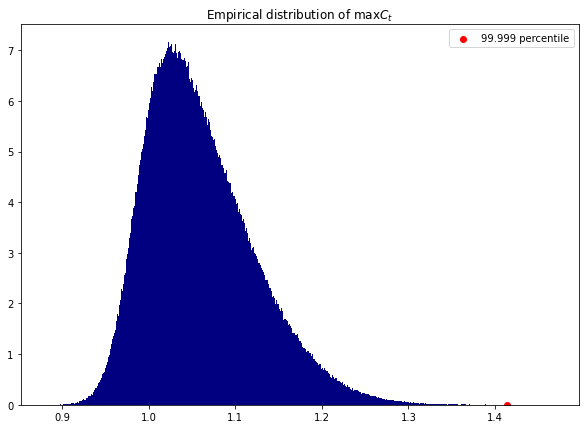

In [4]:
alpha = np.percentile(cons_peaks,q=conf_level) / mu
plt.figure(figsize=[10,7])
plt.hist(cons_peaks, color='navy', bins=500, density=True)
plt.scatter(x=alpha,y=0, color='red', label='99.999 percentile')
plt.title('Empirical distribution of $\max C_t$')
plt.legend()
plt.show()

We have $R \approx 1.42$ and $\alpha=R / \mu=1.42$ as well. This means that for each 100 instances that our client uses on-demand we have to hold more than 40 reserve instances in order to hedge the risk of capacity shortage.


# 3.The Results
Recall Section 1. We have:

$$
\sum_{\tau=1}^{\mathcal{T}} \frac{p^{O D}}{(1+r / \mathcal{T})^{\tau}}=\alpha \mathcal{T} p^{R E}
$$



In [5]:
def dcf(r, n_periods):
    return np.sum( [1/(1+r/n_periods)**(i+1) for i in range(n_periods)])
     
def p_ratio (r, alpha, T):
    return alpha * T / dcf(r,T)


p_ratio(r, alpha, 52)

1.524139745378817

We have $\mathcal{T}=52, r=0.15, \alpha=1.42$ and obtain $\beta=p^{O D} / p^{R E} \approx 1.53$. So we may conclude that price of one on-demand instance should be at least $53 \%$ higher than price of a similar reserved instance.

Now let us check how our findings correspond with the market data. We have downloaded more than 50 prices $p^{R E}$ and $p^{O D}$ for different types of instances offered by Amazon Web Services (see data file attached). At the graph below you can see their scatter plot with OLS regression line $\left(\beta^{O L S} \approx 1.61\right)$ compared with our model predictions:

In [6]:
aws_prices = pd.read_excel('aws_prices.xlsx').iloc[:,:4]
aws_prices.head()

,instance_type,p_RE,p_OD,p_ratio
0,t2.nano,0.003,0.0058,1.933333
1,t2.micro,0.007,0.0116,1.657143
2,t2.small,0.013,0.0230,1.769231
3,t2.medium,0.027,0.0464,1.718519
4,t2.large,0.054,0.0928,1.718519


In [7]:
model = sm.OLS(aws_prices['p_OD'], aws_prices['p_RE'])
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   p_OD   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.952e+04
Date:                Wed, 04 Jan 2023   Prob (F-statistic):                    8.61e-71
Time:                        08:21:51   Log-Likelihood:                         -5.7323
No. Observations:                  55   AIC:                                      13.46
Df Residuals:                      54   BIC:                                      15.47
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
p_RE           1.6062      0.011    139.706      0.000       1.583       1.629
==============================================================================
Omnibus:                       45.495   Durbin-Watson:                   1.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.107
Skew:                           2.243   Prob(JB):                     3.87e-41
Kurtosis:                      10.816   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

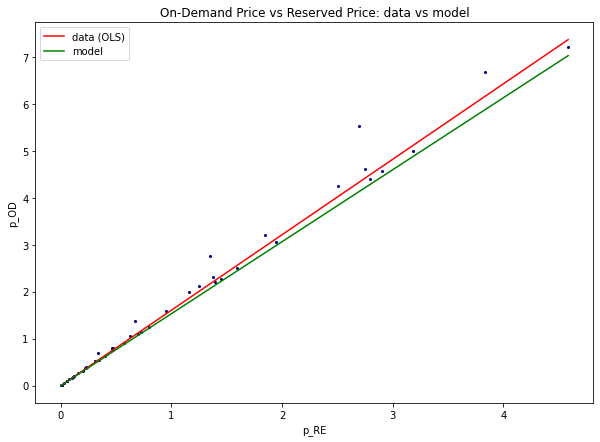

In [8]:
aws_prices = aws_prices[aws_prices['p_RE']<6]

plt.figure(figsize=[10,7])
plt.scatter(x=aws_prices['p_RE'], y=aws_prices['p_OD'], s=4, color='navy', label=None)
plt.plot([0,np.max(aws_prices['p_RE'])], [0,res.params['p_RE'] * np.max(aws_prices['p_RE'])], color='red', 
                                                                                              label='data (OLS)')
plt.plot([0,np.max(aws_prices['p_RE'])], [0,1.532 * np.max(aws_prices['p_RE'])], color='green', 
                                                                                              label='model')

plt.xlabel('p_RE')
plt.ylabel('p_OD')
plt.legend()
plt.title('On-Demand Price vs Reserved Price: data vs model')
plt.show()

As we can see, we seem to be very close to the market data and we cannot reject our model immediately. Underestimation may be explained by the fact, that we have not included another risk factors in our analysis, which could increase required reserves. Also, we need more data to ensure our model works well.